In [1]:
!pip install wandb==0.16.0
!pip install pandas-profiling==3.6.2
!pip install pandas==2.1.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.1.3 which is incompatible.


1. Fetch the artifact we just created (sample.csv) from W&B and read it with pandas:

In [2]:
import wandb
import pandas as pd
# Note that we use save_code=True in the call to wandb.init so the notebook is uploaded and versioned by W&B
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: hgrege3 (hgrege3-western-governors-university). Use `wandb login --relogin` to force relogin


2. Explore the data in df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

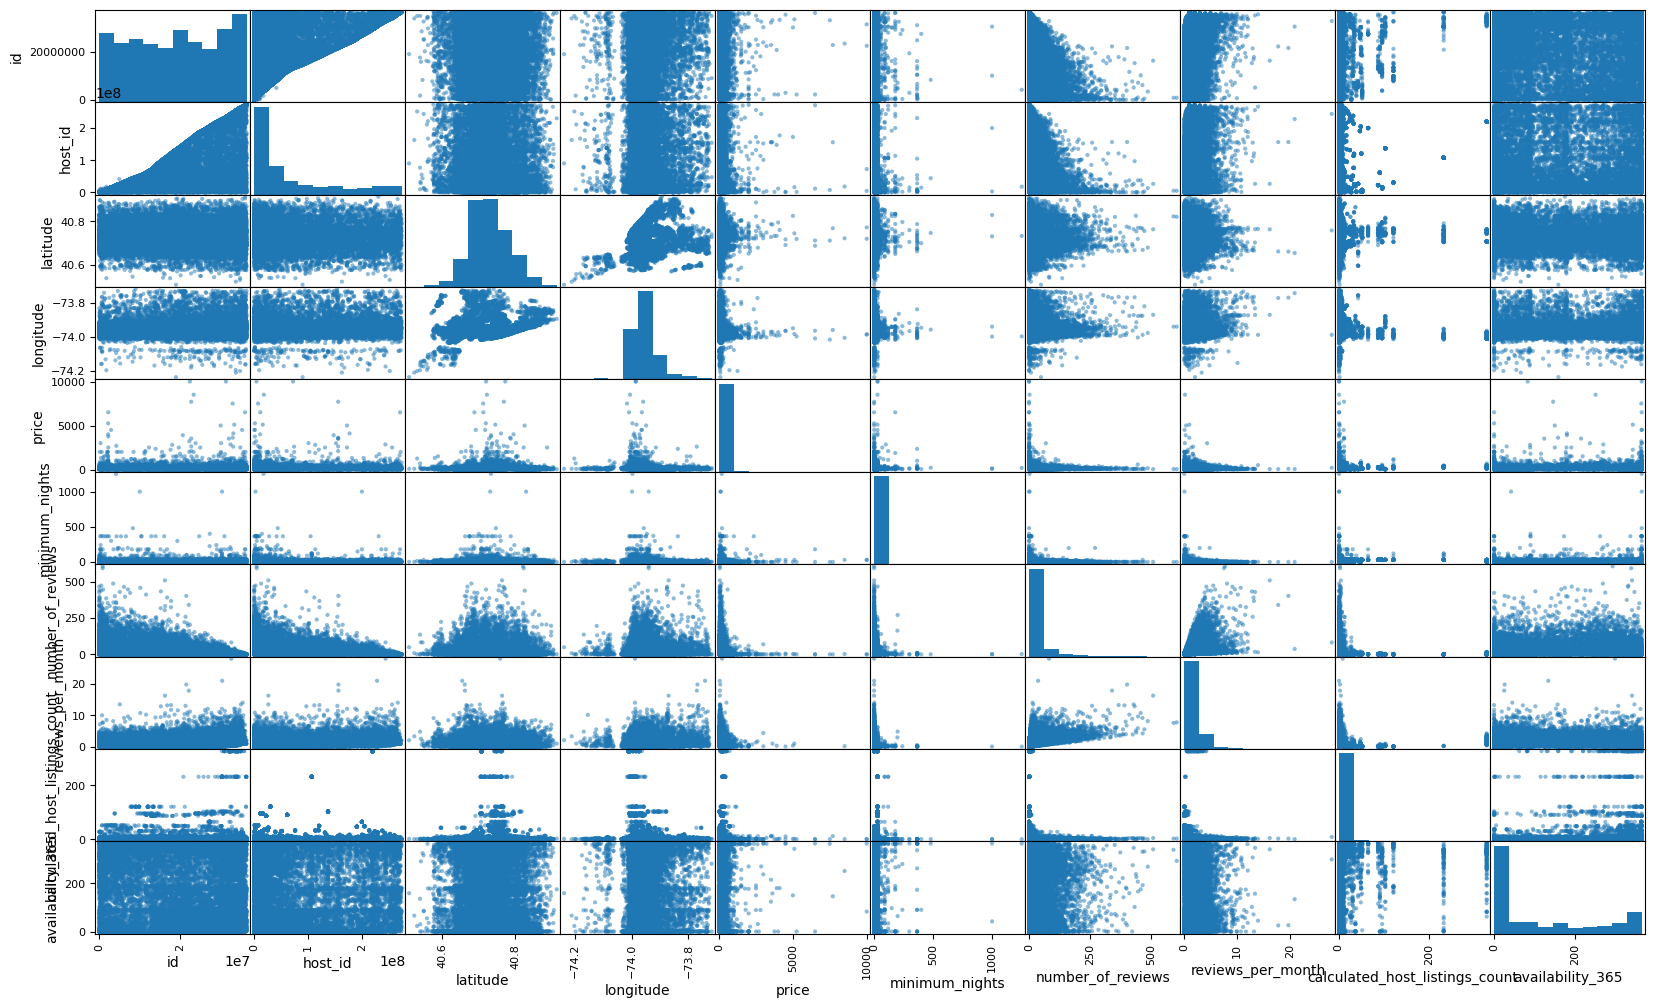

In [7]:
pd.plotting.scatter_matrix(df, figsize=(20, 12));

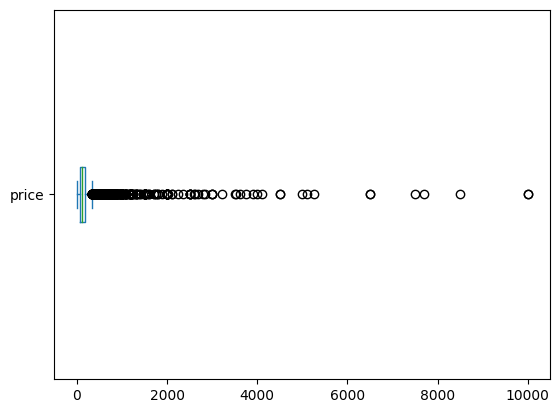

In [8]:
df.price.plot.box(vert=False);

3. What do you notice in the data? Look around and see what you can find.

> For example, there are missing values in a few columns and the column `last_review` is a date but it is in string format. Look also at the `price` column, and note the outliers. There are some zeros and some very high prices. After talking to your stakeholders, you decide to consider from a minimum of `$10` to a maximum of `$350` per night.

4. Fix some of the little problems we have found in the data with the following code:

In [9]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

Note how we did not impute missing values. We will do that in the inference pipeline, so we will be able to handle missing values also in production.

5. Check with df.info() that all obvious problems have been solved

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  number_

6. Terminate the run by running `run.finish()`

In [11]:
run.finish()

7. Save the notebook.